# Visualize training of Beta VAE on dynamic circle/Gaussian data


### training parameters
- Input: sequences of translating circles on Gaussian-blob background (32x32)

- Number of latents: 10

- batch size: 64

- 50K training samples
- RMSprop w lr = 1e-04

- loss: DKL + reconstruction loss + gamma*prediction loss


Beta VAE:
- six different normalized beta Values (spacing of sampling roughly corresponding to Higgins 2017 y-axis):


``` normalized_beta_values = np.logspace(np.log(.001), np.log(5), 6, base=np.e) ```

``` gamma_values = np.logspace(-4, 4, 5, base=10) ```


In [4]:
import torch
import pickle
from models import dynamicVAE32, beta_from_normalized_beta, dynamicVAE32a

from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from data.dspritesbT import dSpriteBackgroundDatasetTime

In [5]:
n_latent = 10

normalized_beta_values = np.logspace(np.log(.001), np.log(5), 6, base=np.e)
gamma_values = np.logspace(-4, 4, 5, base=10)
gamma_values = np.insert(gamma_values,0,0)

N = 1 * 32 * 32
M = 10

beta = beta_from_normalized_beta(normalized_beta_values, N = N, M = M)


for ii,nb in enumerate(normalized_beta_values):
    print(['betanorm = %0.4f / beta = %0.1f' % (normalized_beta_values[ii],beta[ii])])
print('gammas: ', gamma_values)

['betanorm = 0.0010 / beta = 0.1']
['betanorm = 0.0055 / beta = 0.6']
['betanorm = 0.0302 / beta = 3.1']
['betanorm = 0.1657 / beta = 17.0']
['betanorm = 0.9103 / beta = 93.2']
['betanorm = 5.0000 / beta = 512.0']
gammas:  [0.e+00 1.e-04 1.e-02 1.e+00 1.e+02 1.e+04]


In [7]:
vae = list()
training_stats = list()

nb = normalized_beta_values.shape[0]
ng = gamma_values.shape[0]

isTrained = [False]*(nb*ng)

for jj,gamma in enumerate(gamma_values):
    for ii,beta_norm in enumerate(normalized_beta_values):

        # beta values in the file name of checkpoints have varying number of decimal points (not so smart)
        beta_norm_str = '%0.4f' % (beta_norm)
        while beta_norm_str[-1] == '0' and beta_norm_str[-2] != '.':
            beta_norm_str = beta_norm_str[:-1]
#         gamma_str = '%0.4f' % (gamma)

        trainedpath = 'checkpoints/dynamicvae32_nlatent=%s_betanorm=%s_gamma=%s_dsprites_circle_last' % (n_latent,beta_norm_str,gamma)
        trainstatspath = 'trainstats/dynamicvae32_nlatent=%s_betanorm=%s_gamma=%s_dsprites_circle.pkl' % (n_latent,beta_norm_str,gamma)

#         print(jj,ii)
#         try:
        training_stats.append([])
        checkpoint = torch.load(trainedpath)
        
        if jj<1:
            vae.append(dynamicVAE32(n_latent = n_latent))
        else:
            vae.append(dynamicVAE32a(n_latent = n_latent))
        try:
            vae[nb*jj+ii].load_state_dict(checkpoint['model_states']['net'])
        except:
            vae[nb*jj+ii] = dynamicVAE32(n_latent = n_latent)
            vae[nb*jj+ii].load_state_dict(checkpoint['model_states']['net'])
        isTrained[nb*jj+ii] = True
#         except:
#             print('checkpoint not found: %s' % trainedpath)
        try:
            training_stats[nb*jj+ii] = pickle.load(open(trainstatspath, 'rb'))
            lastone=nb*jj+ii
        except:
            print('trainstats not found: %s' % trainstatspath)

0 0
0 1
0 2
0 3
0 4
0 5
1 0
trainstats not found: trainstats/dynamicvae32_nlatent=10_betanorm=0.001_gamma=0.0001_dsprites_circle.pkl
1 1
trainstats not found: trainstats/dynamicvae32_nlatent=10_betanorm=0.0055_gamma=0.0001_dsprites_circle.pkl
1 2
trainstats not found: trainstats/dynamicvae32_nlatent=10_betanorm=0.0302_gamma=0.0001_dsprites_circle.pkl
1 3
trainstats not found: trainstats/dynamicvae32_nlatent=10_betanorm=0.1657_gamma=0.0001_dsprites_circle.pkl
1 4
trainstats not found: trainstats/dynamicvae32_nlatent=10_betanorm=0.9103_gamma=0.0001_dsprites_circle.pkl
1 5
trainstats not found: trainstats/dynamicvae32_nlatent=10_betanorm=5.0_gamma=0.0001_dsprites_circle.pkl
2 0
2 1
2 2
2 3
2 4
2 5
3 0
3 1
3 2
3 3
3 4
3 5
4 0
4 1
4 2
4 3
4 4
4 5
5 0
5 1
5 2
5 3
5 4
5 5


In [8]:
nb*jj+ii,len(vae),vae[nb*jj+ii]

(35, 36, dynamicVAE32(
   (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
   (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
   (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
   (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
   (fc_enc_mu): Linear(in_features=256, out_features=10, bias=True)
   (fc_enc_mu_pred): Linear(in_features=256, out_features=10, bias=True)
   (fc_enc_logvar): Linear(in_features=256, out_features=10, bias=True)
   (fc_dec): Linear(in_features=10, out_features=256, bias=True)
   (convT4): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
   (convT3): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
   (convT2): ConvTranspose2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
   (convT1): ConvTranspose2d(32, 1, kernel_size=(3, 3),

### plot training loss

Three different plots:

- loss = recon_loss + beta * kl_div
- recon_loss
- kl_div

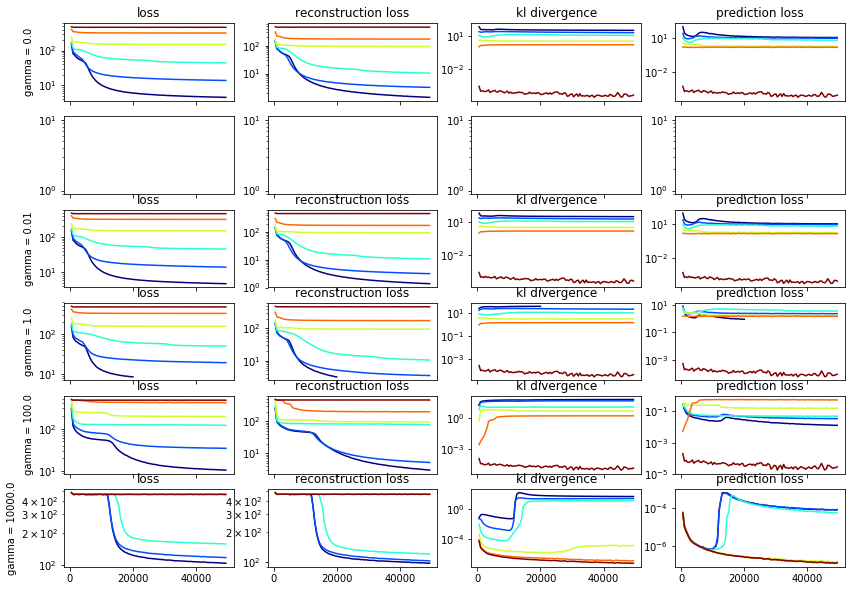

In [9]:
show_until_nth_batch = 200000
idx_lim = np.max(np.where(np.array(training_stats[lastone]['iter']) < show_until_nth_batch))

fig, ax = plt.subplots(ng,4,sharey=False,sharex=True, figsize=(14,10))
ax = ax.flatten()

col = plt.cm.jet(np.linspace(0,1,len(normalized_beta_values)))
for jj,gam in enumerate(gamma_values):
    for ii,_ in enumerate(normalized_beta_values):
        if training_stats[nb*jj+ii]:
            logged_steps = training_stats[nb*jj+ii]['iter'][:idx_lim]
            recon_loss = np.array(training_stats[nb*jj+ii]['recon_loss'][:idx_lim])
            total_kld = np.array(training_stats[nb*jj+ii]['total_kld'][:idx_lim])
            pred_loss = np.array(training_stats[nb*jj+ii]['pred_loss'][:idx_lim])

            ax[4*jj+0].plot(logged_steps, recon_loss+ beta[ii] * total_kld + gam*pred_loss, color=col[ii])
            ax[4*jj+1].plot(logged_steps, recon_loss, color=col[ii])
            ax[4*jj+2].plot(logged_steps, total_kld, color=col[ii])
            ax[4*jj+3].plot(logged_steps, pred_loss, color=col[ii])

            ax[4*jj+0].set(title='loss')
            ax[4*jj+1].set(title='reconstruction loss')
            ax[4*jj+2].set(title='kl divergence')
            ax[4*jj+3].set(title='prediction loss')

            _ = [x.set(yscale='log') for x in ax]

#             if jj<1:
#                 ax[2].legend(['betanorm = %0.3f / beta = %0.1f' % (x,y) for x,y in zip(normalized_beta_values,beta)], loc=1)
            ax[4*jj+0].set(ylabel=('gamma = %s' % gamma_values[jj]))

#### plotting reconstruction loss and kl-divergence + prediction loss for each beta value separately

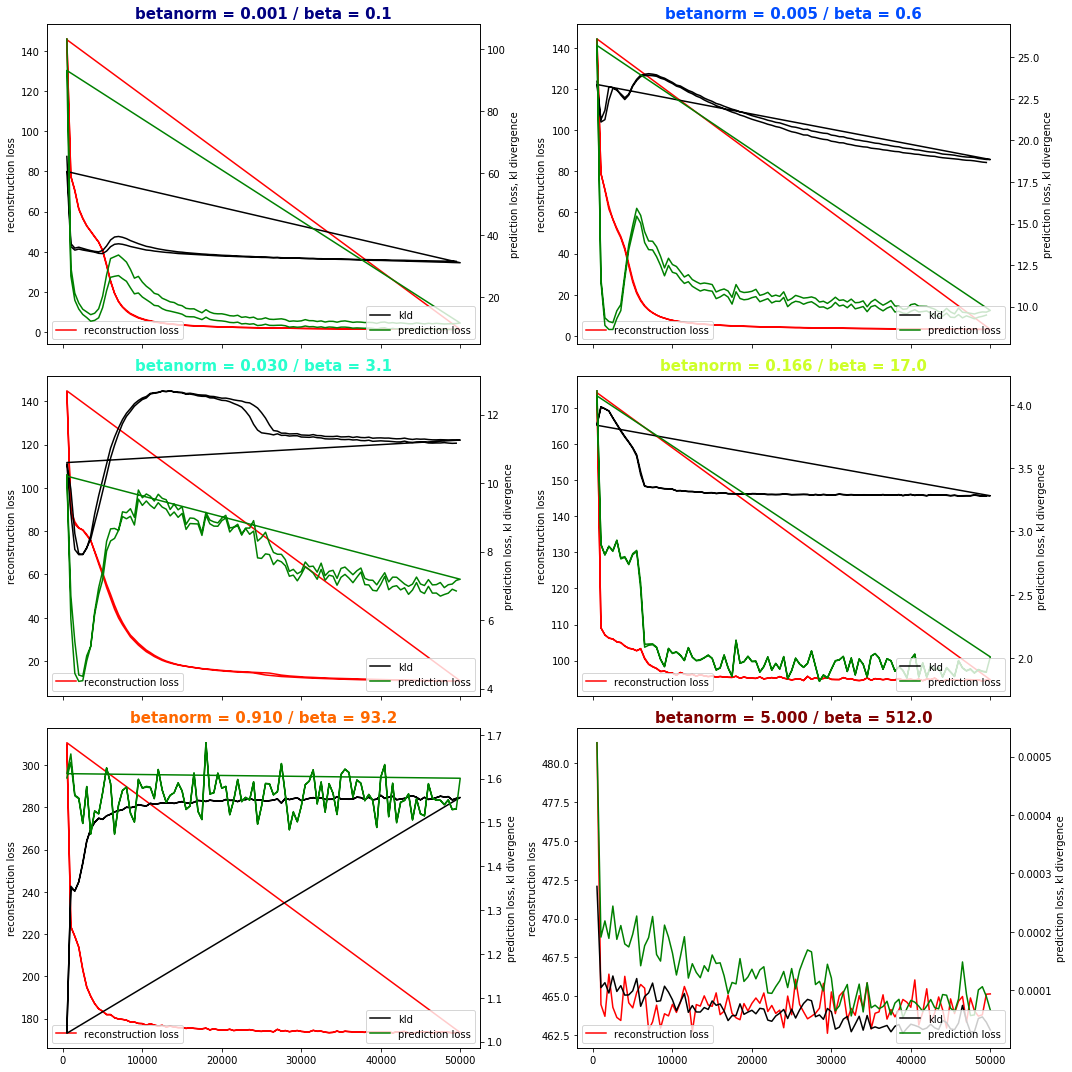

In [10]:
jj=2 # gamma = 0.01
idx_lim = np.max(np.where(np.array(training_stats[nb*jj]['iter']) < show_until_nth_batch))

fig, ax = plt.subplots(3,2,sharey=False,sharex=True, figsize=(15,15))
ax = ax.flatten()

col = plt.cm.jet(np.linspace(0,1,len(normalized_beta_values)))
ax2 = list()
for ii,_ in enumerate(normalized_beta_values):
    logged_steps = training_stats[nb*jj+ii]['iter'][:idx_lim]
    recon_loss = np.array(training_stats[nb*jj+ii]['recon_loss'][:idx_lim])
    total_kld = np.array(training_stats[nb*jj+ii]['total_kld'][:idx_lim])
    pred_loss = np.array(training_stats[nb*jj+ii]['pred_loss'][:idx_lim])
    
    ax[ii].plot(logged_steps, recon_loss, color='r', label='reconstruction loss')
    ax2.append(ax[ii].twinx())
    ax2[ii].plot(logged_steps, total_kld, color='k', label='kld')
    
    ax2[ii].plot(logged_steps, pred_loss, color='g', label='prediction loss')
    
    ##ax[0].set(ylabel='loss')
    #ax[1].set(ylabel='reconstruction loss')    
    ax[ii].set(ylabel='reconstruction loss')
    ax2[ii].set(ylabel='prediction loss, kl divergence')
    plt.title('betanorm = %0.3f / beta = %0.1f' % (normalized_beta_values[ii],beta[ii]), color=col[ii], 
              fontweight='bold', fontsize = 15)
    
    ax[ii].legend(loc=3)
    ax2[ii].legend(loc=4)
    
fig.tight_layout()

prediction loss tends to track KL-divergence

## load some data and plot reconstructions


In [11]:
ds = dSpriteBackgroundDatasetTime(transform=transforms.Resize(32),shapetype = 'circle')

In [12]:
isTrained

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

/home/zaharia/anaconda_envs/pytorchenv/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


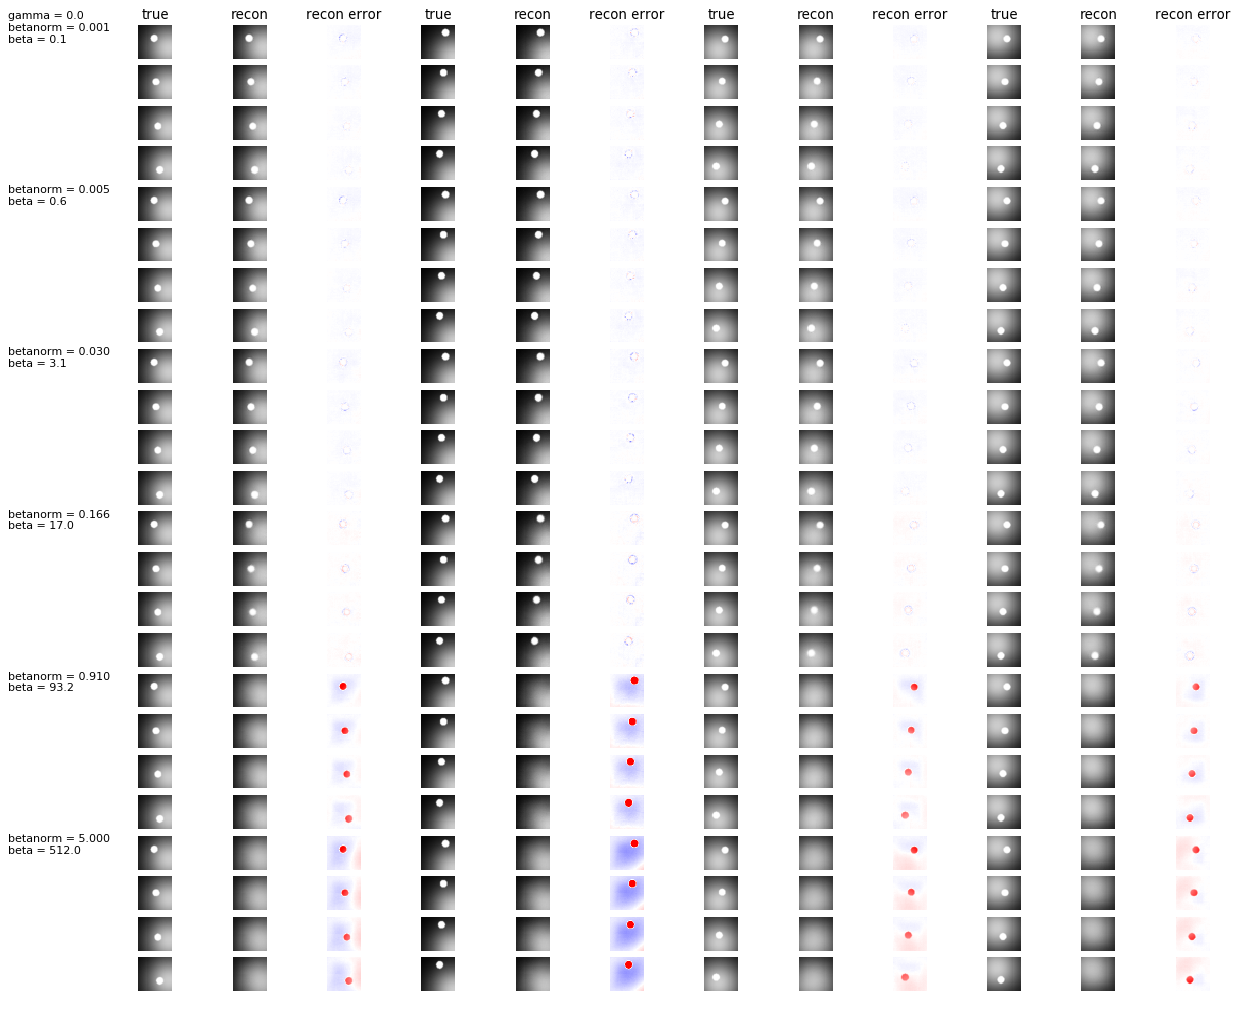

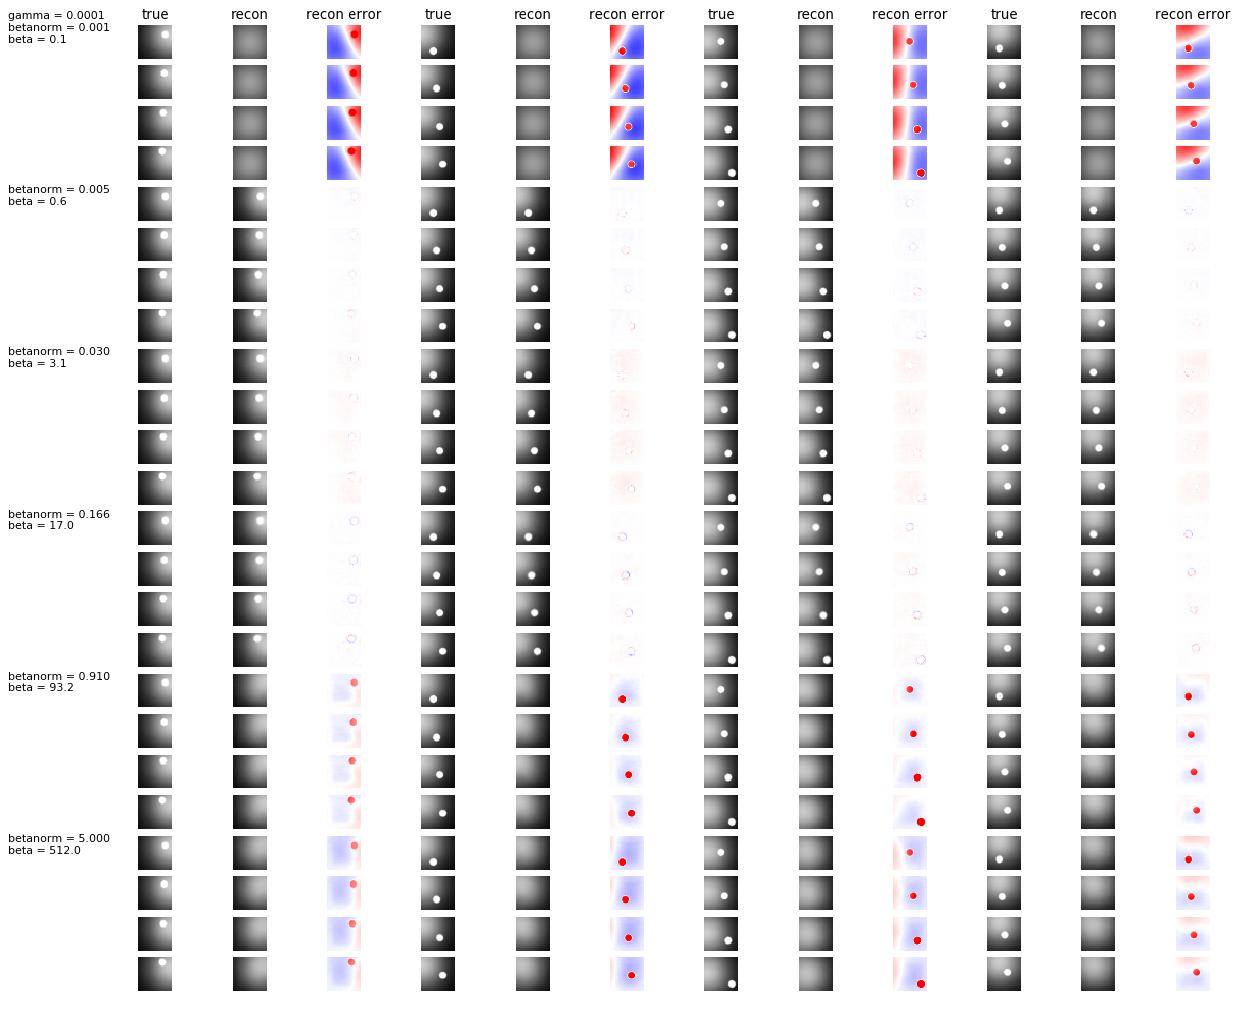

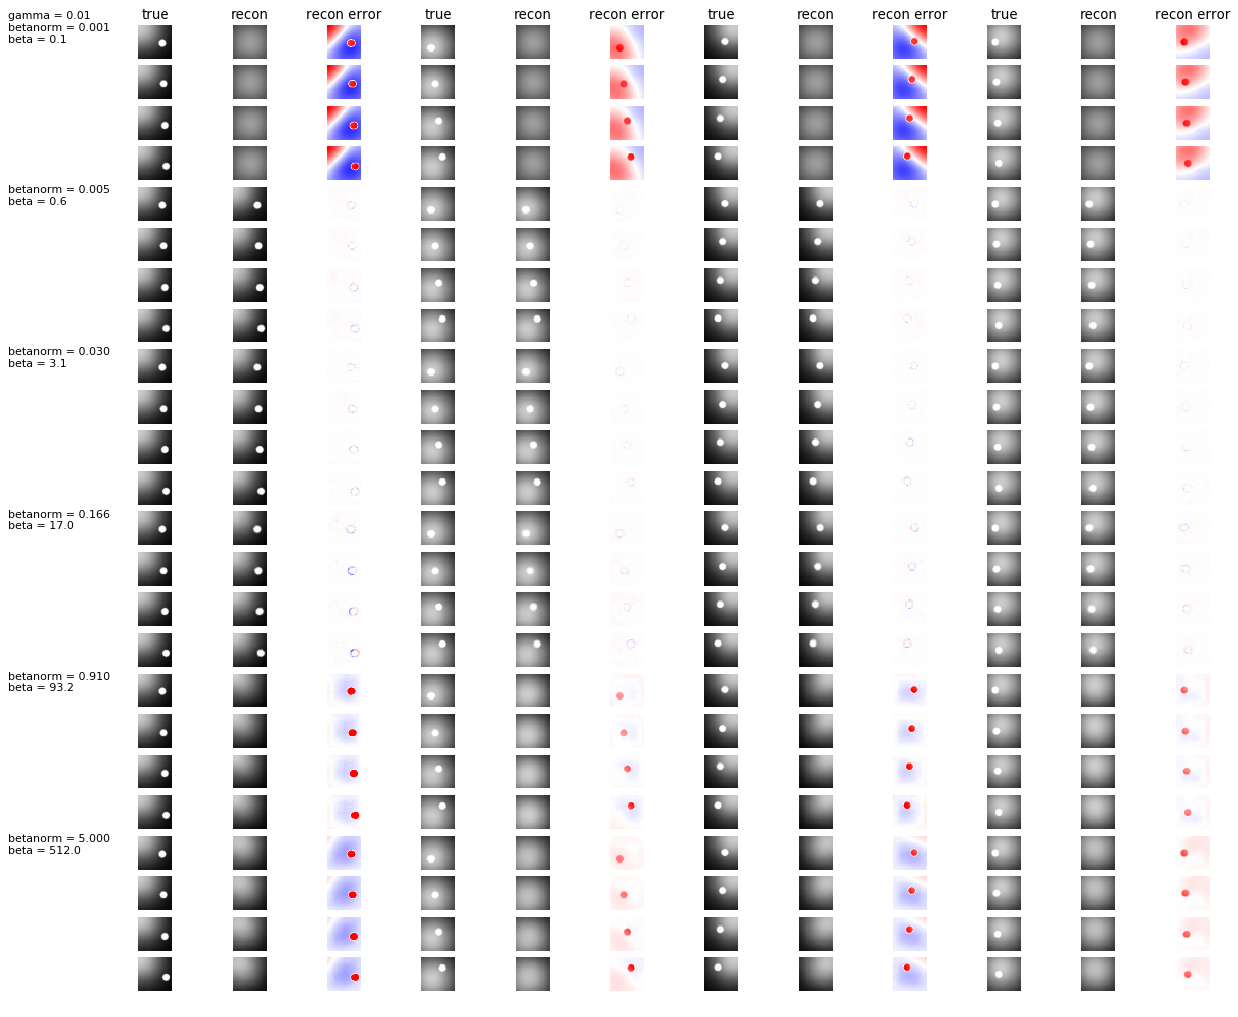

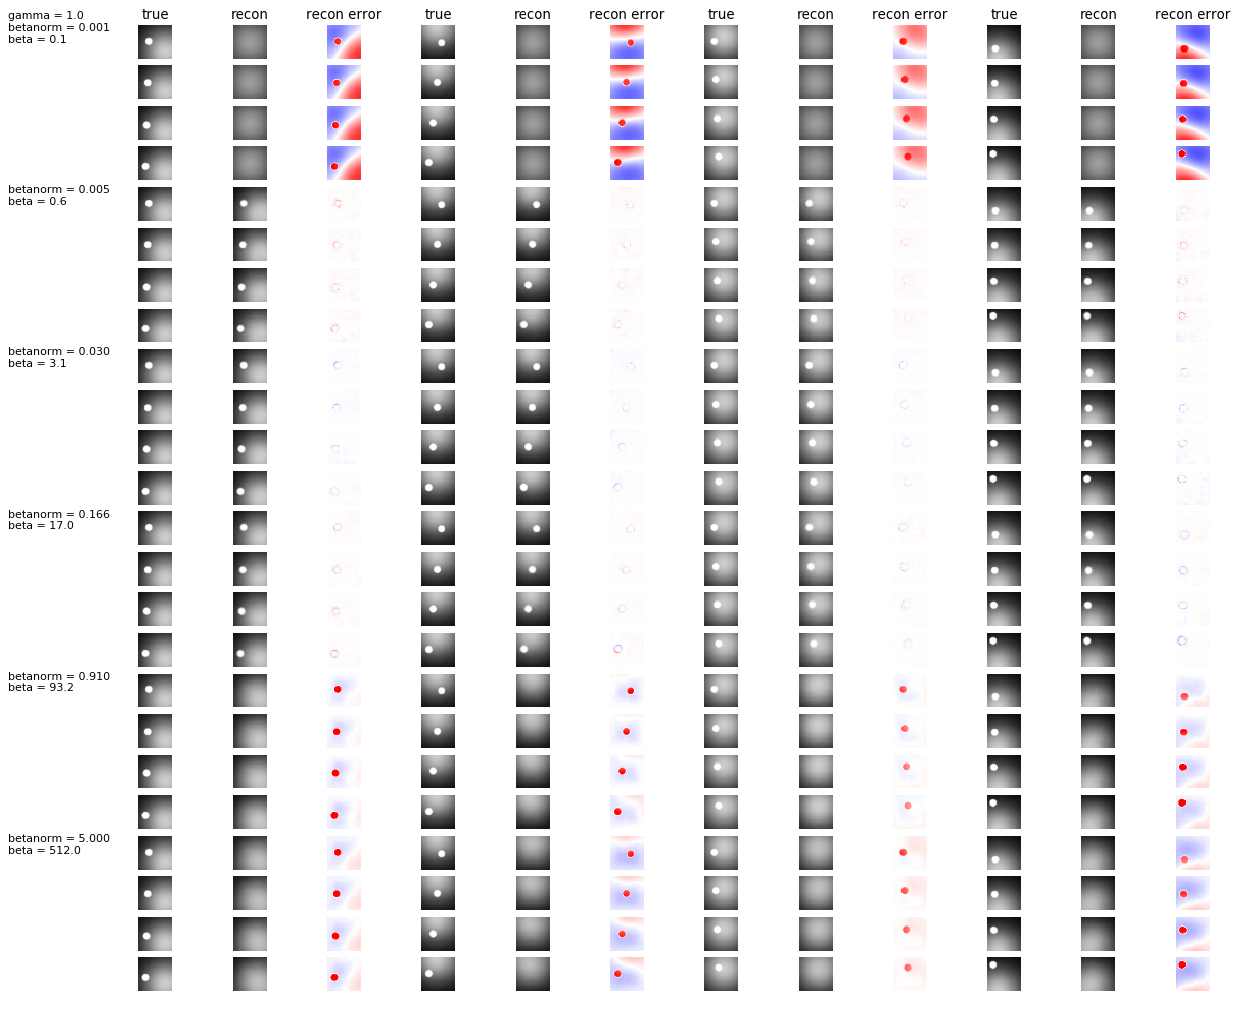

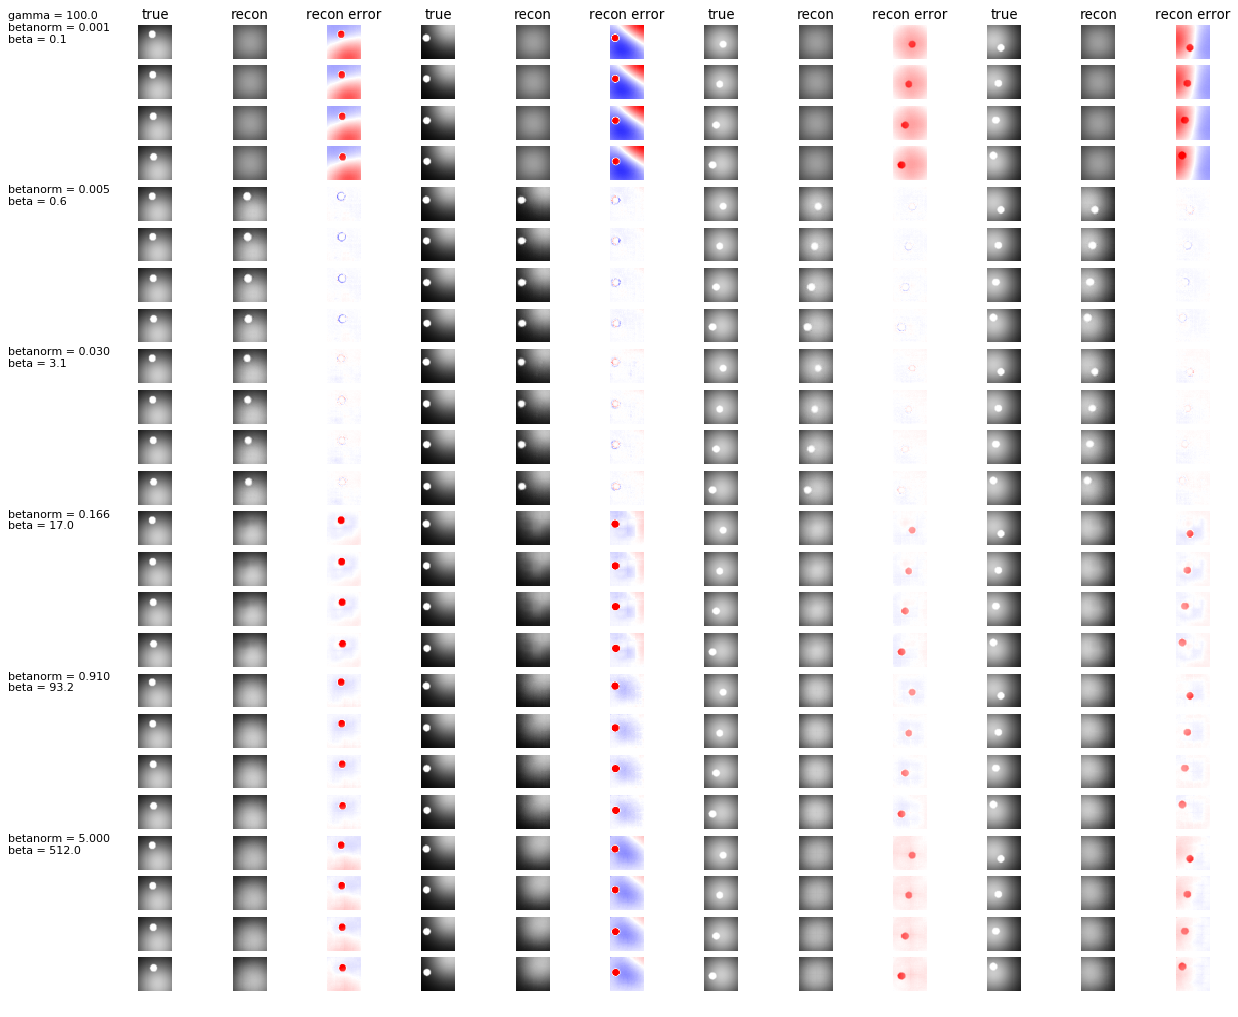

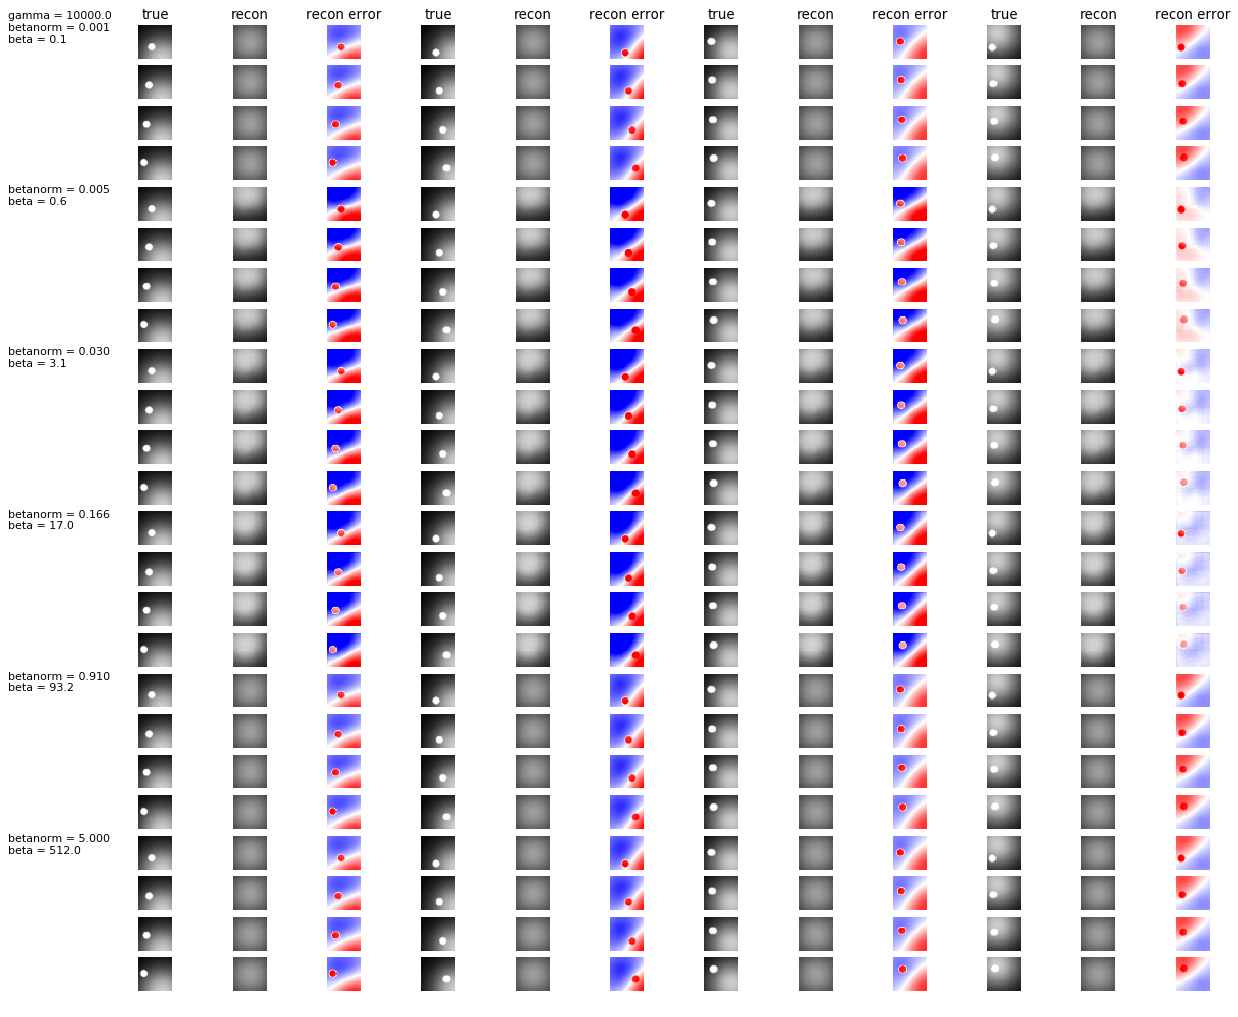

In [22]:
for gg,gam in enumerate(gamma_values): # loop across rows (different gamma values)

    if any(isTrained[(nb*gg+0):(nb*gg+nb)]):
        fig, ax = plt.subplots(nb*4,12,figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
        ax = ax.flatten()
        m = .5
        img_idx = np.random.randint(1000, size=4)

        for jj,_ in enumerate(normalized_beta_values): # loop across rows (different beta values)
            if isTrained[nb*gg+jj]:
                for ii in range(4): # loop across different samples

                    x,label = ds[img_idx[ii]]
                    x = x[np.newaxis, :, :]

                    mu, logvar = vae[nb*gg+jj].encode(x.float())
                    recon = vae[nb*gg+jj].decode(mu).detach()
                    diff = x - recon

                    for ff in range(1,5):
                        axnum = jj*12*4+(ff-1)*12+ii*3
                        plt.set_cmap('gray')
                        ax[axnum+0].imshow(x[:,ff*2,:,:,:].squeeze(), vmin=0, vmax=1)
                        ax[axnum+0].axis('off')

                        ax[axnum+1].imshow(recon[:,ff*2,:,:,:].squeeze(), vmin=0, vmax=1)
                        ax[axnum+1].axis('off')

                        plt.set_cmap('bwr')
                        img = ax[axnum+2].imshow(diff[:,ff*2,:,:,:].numpy().squeeze(), vmin=-m, vmax=m)
                        ax[axnum+2].axis('off')

                pos = ax[jj*12*4].get_position()
                if jj==0:
                    fig.text(.05, pos.y0 + pos.height/2, 'gamma = %s\nbetanorm = %0.3f\nbeta = %0.1f' % (gam,normalized_beta_values[jj],beta[jj]))
                else:
                    fig.text(.05, pos.y0 + pos.height/2, 'betanorm = %0.3f\nbeta = %0.1f' % (normalized_beta_values[jj],beta[jj]))

        for ii in range(4):
            ax[ii*3+0].set(title='true')
            ax[ii*3+1].set(title='recon')
            ax[ii*3+2].set(title='recon error')
    

Each row displays the true/reconstructed/error for four samples with one beta.

- Interestingly, with increased beta, the circle object gets lost / is not captured by the VAE any more. 

- At very high beta values, the gaussian background blob is always reconstructed at the same (central) location. This is the case, when q(z|x) is almost equal to p(z), hence indepndent of x. The best "reconstruction" (to minimize reconstruction loss) is the mean image. -> probably, what we see in the high-beta reconstruction case is therefore not a central Gaussian but the average of all circle positions. As circles are constrained to not touch the image borders, this mean image looks like a centered Gaussian.

#### PLOT RECONSTRUCTION ERROR, PREDICTION ERROR

In [13]:
from models import prediction_loss,reconstruction_loss,kl_divergence,loss_function

In [14]:
nsamples = 100
pred_loss = np.zeros(shape=(ng,nb,nsamples),dtype=float)
recon_loss = np.zeros(shape=(ng,nb,nsamples),dtype=float)
kl_div = np.zeros(shape=(ng,nb,nsamples),dtype=float)
total_loss = np.zeros(shape=(ng,nb,nsamples),dtype=float)

for ii in range(nsamples): # loop across different samples
    x,_ = ds[ii]
    x = x[np.newaxis, :, :]

    for gg in range(ng):
        for jj in range(nb):
            recon,mu,logvar,mu_pred = vae[nb*gg+jj].forward(x.float())

            pred_loss[gg,jj,ii] = prediction_loss(mu,mu_pred)
            recon_loss[gg,jj,ii] = reconstruction_loss(x,recon)
            _,_,kl_div[gg,jj,ii] = kl_divergence(mu,logvar)
            total_loss[gg,jj,ii] = loss_function(recon_loss[gg,jj,ii],kl_div[gg,jj,ii],pred_loss[gg,jj,ii],
                                                 normalized_beta_values[jj],gamma_values[gg])
    

/home/zaharia/anaconda_envs/pytorchenv/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Text(0.5, 1.0, 'total loss')

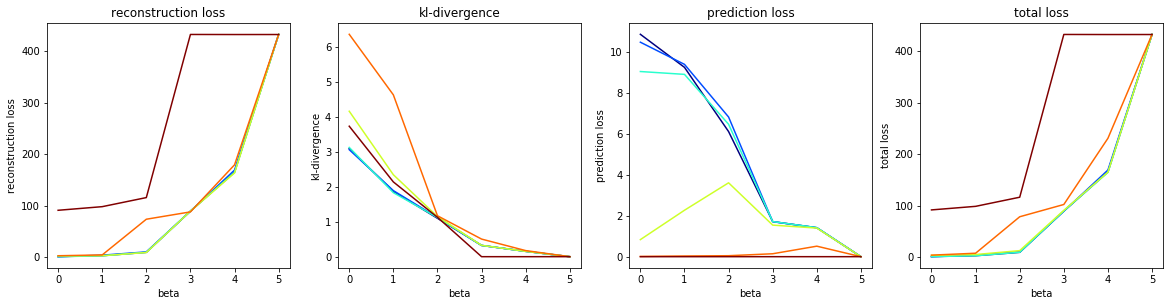

In [15]:
col = plt.cm.jet(np.linspace(0,1,len(normalized_beta_values)))
fig, ax = plt.subplots(1,4,figsize=(20,4.5))

plt.subplot(1,4,1)
plt.gca().set_prop_cycle(color=col)
plt.plot(recon_loss.mean(2).T)
# plt.colorbar()
# plt.set_cmap('gray_r')
plt.xlabel('beta')
plt.ylabel('reconstruction loss')
plt.title('reconstruction loss')

plt.subplot(1,4,2)
plt.gca().set_prop_cycle(color=col)
plt.plot(kl_div.mean(2).T)
# plt.colorbar()
# plt.set_cmap('gray_r')
plt.xlabel('beta')
plt.ylabel('kl-divergence')
plt.title('kl-divergence')

plt.subplot(1,4,3)
plt.gca().set_prop_cycle(color=col)
plt.plot(pred_loss.mean(2).T)
# plt.colorbar()
# plt.set_cmap('gray_r')
plt.xlabel('beta')
plt.ylabel('prediction loss')
plt.title('prediction loss')

plt.subplot(1,4,4)
plt.gca().set_prop_cycle(color=col)
plt.plot(total_loss.mean(2).T)
# plt.colorbar()
# plt.set_cmap('gray_r')
plt.xlabel('beta')
plt.ylabel('total loss')
plt.title('total loss')

In [16]:
from analyses.analyses import *

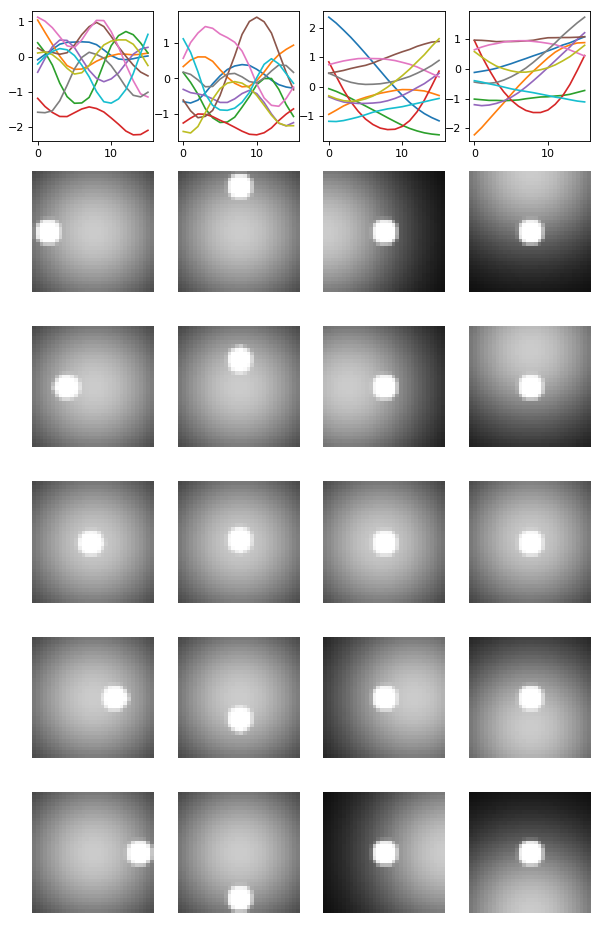

In [17]:
yhat = torch.Tensor(16*n_latent,n_latent,ng,nb)
for gg in range(ng):
    for jj in range(nb):
        yhat[:,:,gg,jj], x_sweep = sweepCircleLatents(vae[nb*gg+jj])
_ = plotCircleSweep(yhat[:,:,2,0], x_sweep)

In [15]:
# fig,ax = plotCircleSweep(yhat, x_sweep, len(vae))

/home/zaharia/anaconda_envs/pytorchenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


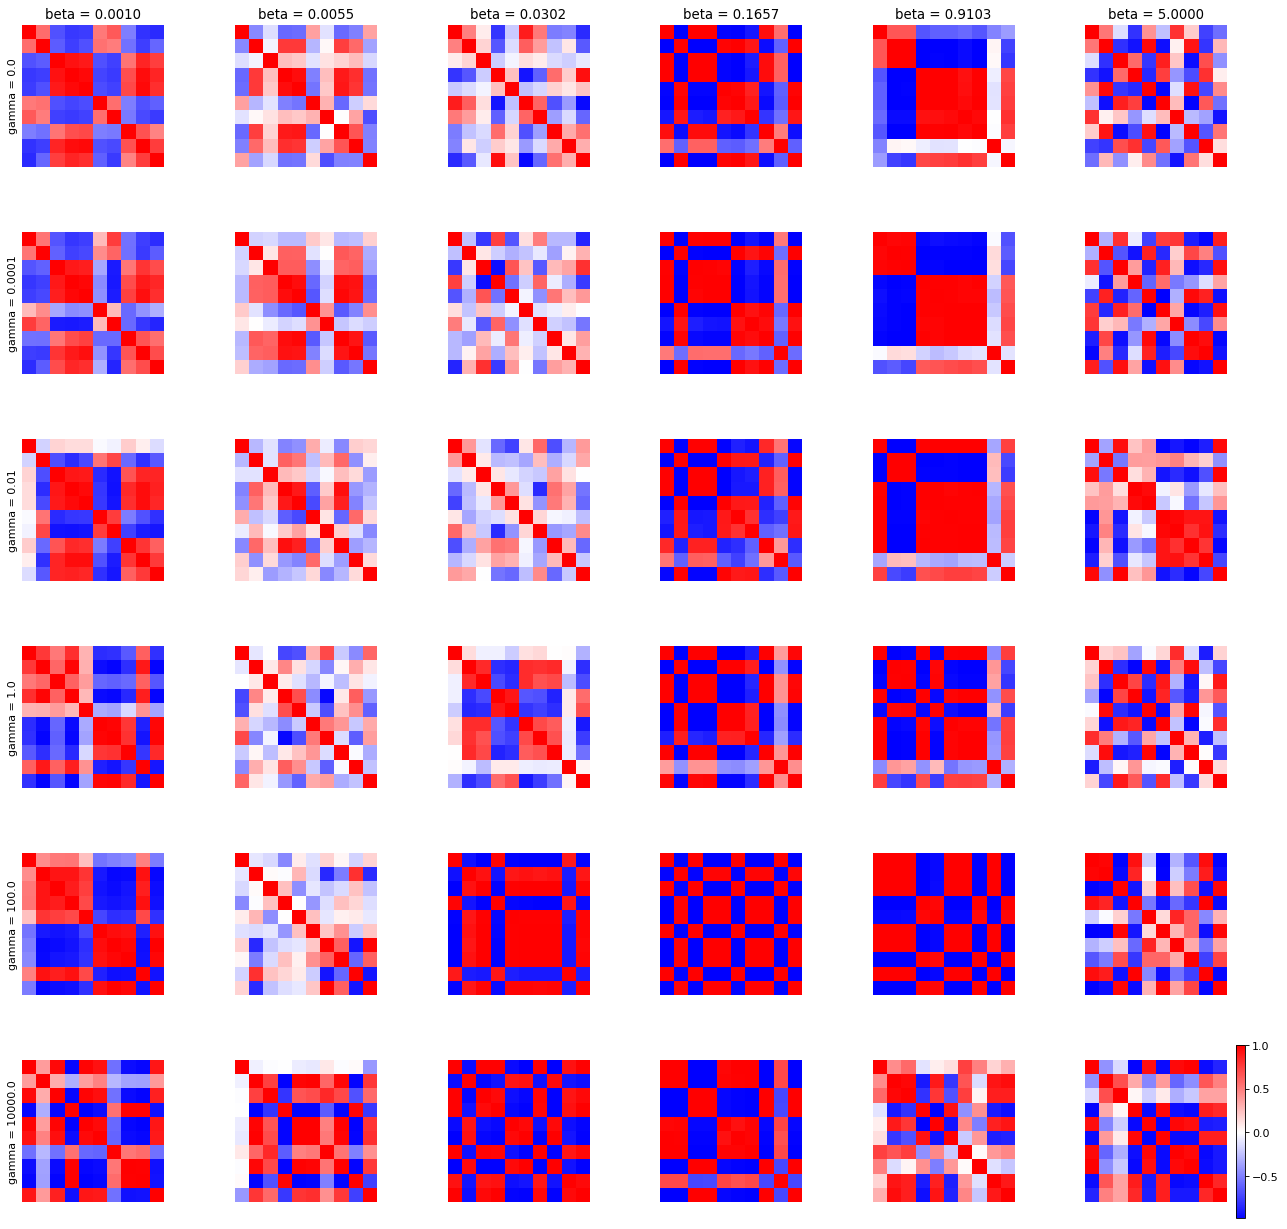

In [20]:
ng=6
nb=6
mss = np.ndarray(shape=(ng,nb),dtype=float)

fig, ax = plt.subplots(ng,nb,figsize=(20,20),
                       dpi= 80, facecolor='w', edgecolor='k')
for gg in range(ng):
    for jj in range(nb):
        plt.subplot(ng,nb,gg*nb+jj+1)
        
        corr_sup = np.corrcoef(yhat[:,:,gg,jj].detach().numpy().T)
        # mean of squared off-diagonal elements
        mss[gg,jj] = np.mean((corr_sup-np.eye(n_latent))**2)
        
        # Plot covariance
        plt.set_cmap('bwr')
        plt.imshow(corr_sup)
        cb = plt.colorbar()
        colorAxisNormalize(cb)
        ax[gg,jj] = plt.gca()
        ax[gg,jj].axes.get_xaxis().set_ticks([])
        ax[gg,jj].axes.get_yaxis().set_ticks([])
        plt.box('off')
        if jj is not nb-1 or gg is not ng-1:
            cb.remove()
        if gg==0:
            plt.title('beta = %0.4f' % normalized_beta_values[jj])
        if jj==0:
            plt.ylabel('gamma = %s' % gamma_values[gg])


Text(0.5, 1.0, 'mean squared cross-correlations')

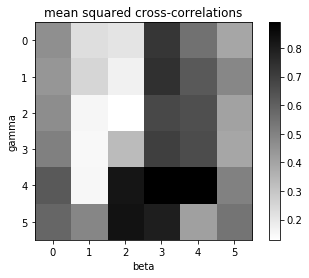

In [21]:
plt.imshow(mss)
plt.colorbar()
plt.set_cmap('gray_r')
plt.ylabel('gamma')
plt.xlabel('beta')
plt.title('mean squared cross-correlations')

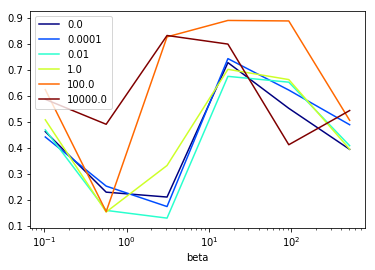

In [22]:
plt.gca().set_prop_cycle(color=col)
plt.plot(beta,mss.T)
plt.xscale('log')
plt.xlabel('beta')
plt.legend(gamma_values)